In [1]:
import pandas as pd
from plotnine import *
from plotnine.themes import theme
from plotnine.facets import facet_wrap

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
Happy = pd.read_csv("../Data/Happiness.csv")
Happy.head()

,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015


In [8]:
#1.1 Region 별 개수를 구하시오.
Happy.groupby('Region')['Region'].count()

Region
Sub-Saharan Africa                 117
Central and Eastern Europe          87
Latin America and Caribbean         68
Western Europe                      63
Middle East and Northern Africa     58
Name: Region, dtype: int64

In [9]:
#1.2 Region 별 개수를 구하고 내림차순으로 정렬하시오.
Happy.groupby('Region')['Region'].count().


Region
Sub-Saharan Africa                 117
Central and Eastern Europe          87
Latin America and Caribbean         68
Western Europe                      63
Middle East and Northern Africa     58
Southeastern Asia                   26
Southern Asia                       21
Eastern Asia                        16
North America                        6
Australia and New Zealand            6
Name: Region, dtype: int64

In [13]:
#1.3 Region별 정부 평균신뢰도를 구하고 가장작은 3곳을 출력하시오.
Happy.groupby('Region').mean()['Trust'].sort_values(ascending=True).head(3)

Region
Central and Eastern Europe     0.084788
Southern Asia                  0.103500
Latin America and Caribbean    0.103720
Name: Trust, dtype: float64

In [20]:
#1.4 South Korea의 2016년 행복지수와 순위를 구하시오.
Happy[(Happy['Country']=="South Korea")&(Happy['year']==2016)][['Country','H_Rank','H_Score']]

,Country,H_Rank,H_Score
215,South Korea,57,5.835


In [30]:
#1.5 Country별 3개년 H_Score 합산 상위 5개국을 출력하[]시오.
Happy.groupby('Country').sum()[['H_Score']].sort_values(by='H_Score',ascending=False).head(5)

,H_Score
Country,
Switzerland,22.590
Denmark,22.575
Iceland,22.566
Norway,22.557
Finland,22.288


In [19]:
#1.6. 2015년에 비해 행복지수 순위가 가장 높아진 국가 상위5개를 출력하시오.

h2015 = Happy[Happy['year']==2015]
h2017 = Happy[Happy['year']==2017]
h2015

,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,0.67042,0.22208,0.77370,0.59201,0.22628,154,3.465,0.42864,Sub-Saharan Africa,0.55191,2015
154,Benin,1.63328,0.28665,0.35386,0.48450,0.18260,155,3.340,0.31910,Sub-Saharan Africa,0.08010,2015
155,Syria,0.32858,0.66320,0.47489,0.15684,0.47179,156,3.006,0.72193,Middle East and Northern Africa,0.18906,2015
156,Burundi,1.83302,0.01530,0.41587,0.11850,0.19727,157,2.905,0.22396,Sub-Saharan Africa,0.10062,2015


In [20]:
dff = pd.merge(h2015,h2017, on='Country')

In [21]:
dff

,Country,DR_x,Economy_x,Family_x,Freedom_x,Generosity_x,H_Rank_x,H_Score_x,Health_x,Region_x,...,Economy_y,Family_y,Freedom_y,Generosity_y,H_Rank_y,H_Score_y,Health_y,Region_y,Trust_y,year_y
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,...,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,Western Europe,0.367007,2017
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,...,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,Western Europe,0.153527,2017
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,...,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,Western Europe,0.400770,2017
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,...,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,Western Europe,0.315964,2017
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,...,1.479204,1.481349,0.611101,0.435540,7,7.316,0.834558,North America,0.287372,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Rwanda,0.67042,0.22208,0.77370,0.59201,0.22628,154,3.465,0.42864,Sub-Saharan Africa,...,0.368746,0.945707,0.581844,0.252756,151,3.471,0.326425,Sub-Saharan Africa,0.455220,2017
145,Benin,1.63328,0.28665,0.35386,0.48450,0.18260,155,3.340,0.31910,Sub-Saharan Africa,...,0.431085,0.435300,0.425963,0.207948,143,3.657,0.209930,Sub-Saharan Africa,0.060929,2017
146,Syria,0.32858,0.66320,0.47489,0.15684,0.47179,156,3.006,0.72193,Middle East and Northern Africa,...,0.777153,0.396103,0.081539,0.493664,152,3.462,0.500533,Middle East and Northern Africa,0.151347,2017
147,Burundi,1.83302,0.01530,0.41587,0.11850,0.19727,157,2.905,0.22396,Sub-Saharan Africa,...,0.091623,0.629794,0.059901,0.204435,154,2.905,0.151611,Sub-Saharan Africa,0.084148,2017


In [22]:
dff['H_diff']=dff['H_Rank_y']-dff['H_Rank_x']

In [23]:
dff = dff[['Country','H_diff']]

In [24]:
dff.head()

,Country,H_diff
0,Switzerland,3
1,Iceland,1
2,Denmark,-1
3,Norway,-3
4,Canada,2


In [25]:
res = Happy[Happy['year']==2017][['Country','H_Rank','H_Score','Health']]

In [26]:
res

,Country,H_Rank,H_Score,Health
315,Norway,1,7.537,0.796667
316,Denmark,2,7.522,0.792566
317,Iceland,3,7.504,0.833552
318,Switzerland,4,7.494,0.858131
319,Finland,5,7.469,0.809158
...,...,...,...,...
463,Rwanda,151,3.471,0.326425
464,Syria,152,3.462,0.500533
465,Tanzania,153,3.349,0.364509
466,Burundi,154,2.905,0.151611


In [27]:
final = pd.merge(res,dff,on='Country')

In [28]:
final.head()

,Country,H_Rank,H_Score,Health,H_diff
0,Norway,1,7.537,0.796667,-3
1,Denmark,2,7.522,0.792566,-1
2,Iceland,3,7.504,0.833552,1
3,Switzerland,4,7.494,0.858131,3
4,Finland,5,7.469,0.809158,-1


In [29]:
final.sort_values(by='H_diff',ascending=True).head()

,Country,H_Rank,H_Score,Health,H_diff
51,Latvia,54,5.850,0.638567,-35
99,Egypt,104,4.735,0.520187,-31
71,Hungary,75,5.324,0.687763,-29
100,Bulgaria,105,4.714,0.708218,-29
54,Romania,57,5.825,0.685158,-29


In [30]:

#1.7. 2015년에 비해 행복지수 순위가 가장 떨어진 국가 상위 5개를 출력하시오
final.sort_values(by='H_diff',ascending=False).head()

,Country,H_Rank,H_Score,Health,H_diff
78,Venezuela,82,5.250,0.617144,59
133,Lesotho,139,3.808,0.000000,42
141,Liberia,148,3.533,0.229918,32
110,Zambia,116,4.514,0.257836,31
139,Haiti,145,3.603,0.277321,26


In [10]:

#1.8 year, Region 별 H_Score 평균과 분산을 구하시오. head() 출력
Happy.groupby(['year','Region'])[['H_Score']].agg(['min','var']).head()

H_Score          
                                         min       var
year Region                                           
2015 Australia and New Zealand         7.284  0.000002
     Central and Eastern Europe        4.218  0.325408
     Eastern Asia                      4.874  0.306975
     Latin America and Caribbean       4.518  0.530800
     Middle East and Northern Africa   3.006  1.213042

In [ ]:
#1.9 2017년에 Family가 H_Score에 차지하는 비율이 가장 높은 국가 3곳 출력

In [20]:
Happy["Family_prop"] = Happy['Family']/Happy['H_Score']

In [26]:
Happy.sort_values(by='Family_prop',ascending=False).head(3)


,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year,Family_prop
444,Ukraine,0.814382,0.894652,1.394538,0.122975,0.270061,132,4.096,0.575904,Central and Eastern Europe,0.023029,2017,0.340463
454,Botswana,0.377914,1.122094,1.221555,0.505196,0.099348,142,3.766,0.341756,Sub-Saharan Africa,0.098583,2017,0.324364
451,Lesotho,1.429835,0.521021,1.190095,0.390661,0.157497,139,3.808,0.000000,Sub-Saharan Africa,0.119095,2017,0.312525


In [39]:
#문제 2. plotnine 이용하기
Happy = pd.read_csv("../Data/Happiness.csv")
Happy.head()

,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015


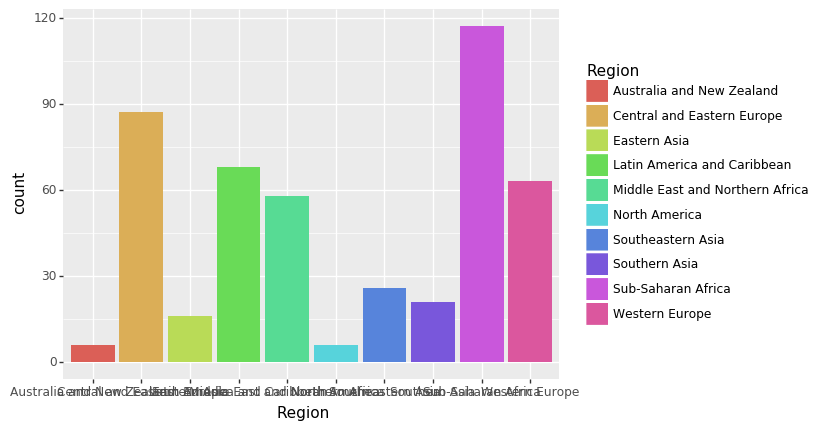

<ggplot: (-9223371873428006764)>

In [40]:
 # 2.1 Region별 국가 수 를 그리시오.

(ggplot(Happy, aes(x = 'Region', fill='Region')) + geom_bar())

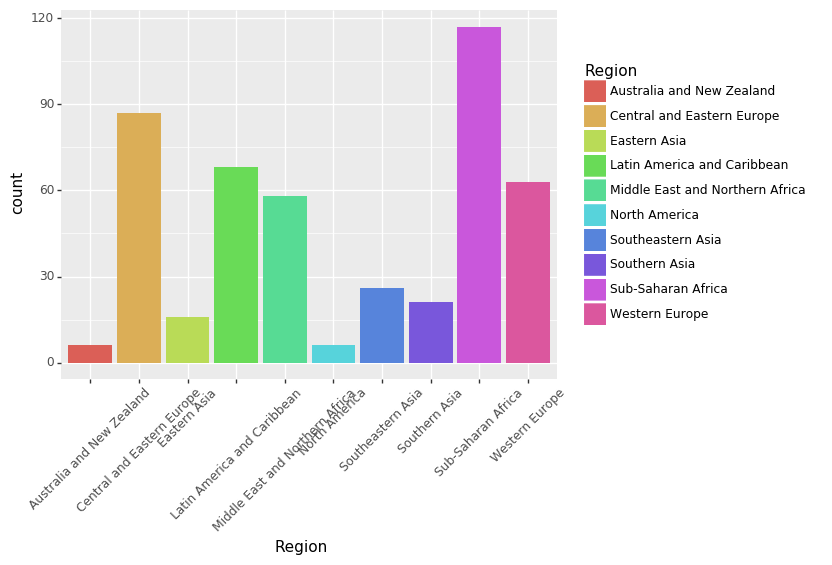

<ggplot: (-9223371873434762500)>

In [41]:
#Step2
#theme 함수를 이용하여 x축 값 45º 회전하기
(ggplot(Happy, aes(x = 'Region', fill='Region')) + geom_bar() + theme(axis_text_x=element_text(angle=45)))

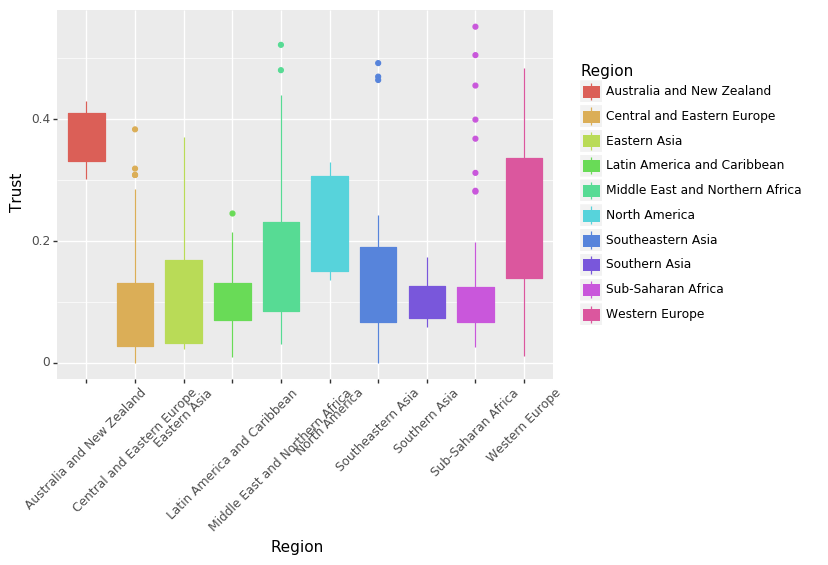

<ggplot: (-9223371873427437588)>

In [42]:
#2.2 Trust(정부신뢰도) Region별 Boxplot을 그리시오.
#Step1
(ggplot(Happy, aes('Region','Trust',fill = 'Region', color = 'Region'))+ geom_boxplot() + theme(axis_text_x=element_text(angle=45)))

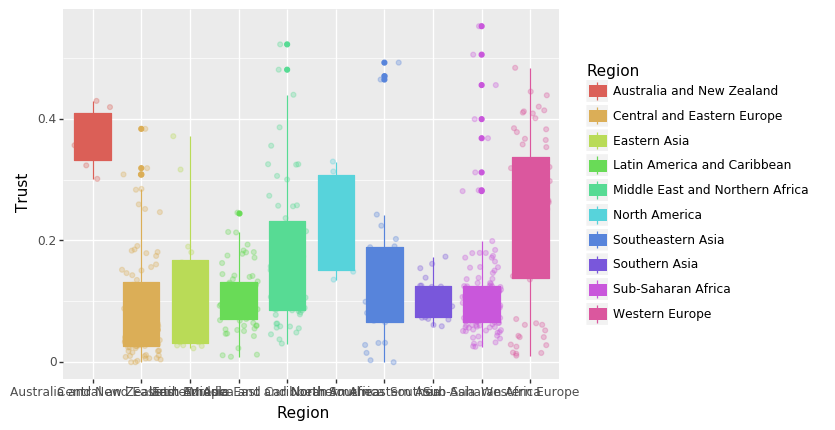

<ggplot: (-9223371873427434504)>

In [43]:
#Step2
(ggplot(Happy, aes('Region','Trust',fill = 'Region', color = 'Region')) + geom_boxplot() + geom_jitter(alpha=0.3))

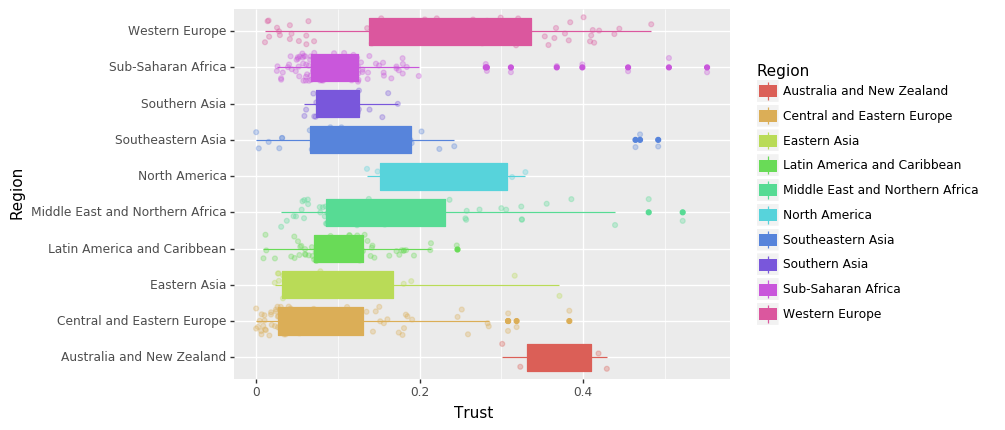

<ggplot: (-9223371873427496108)>

In [44]:
#step3
(ggplot(Happy, aes('Region','Trust',fill = 'Region', color = 'Region')) + geom_boxplot() + geom_jitter(alpha=0.3) + coord_flip())

In [75]:
#2.3 2017년 기준 상위 10개국에서 H_Score에 영향을 주는 요인들 비중을 그리시오.
##Step1   year이 2017년이고 H_rank가 10이하 필터링   head() 출력

df = Happy[(Happy['year']==2017)&(Happy['H_Rank']<=10)].head()
df

,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year
315,Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,Western Europe,0.315964,2017
316,Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,Western Europe,0.400770,2017
317,Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,Western Europe,0.153527,2017
318,Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,Western Europe,0.367007,2017
319,Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,Western Europe,0.382612,2017


In [76]:
#Tidy data로 만들기
#id_var: Country
#melt_vars: DR, Economy, Family, Freedom, Generosity, Health, Trust
#select('Country', 'variable', 'value') 후 head() 
df= df.drop(['H_Rank','H_Score','year','Region'],axis=1)
df = pd.melt(df, id_vars=['Country'])
df

,Country,variable,value
0,Norway,DR,2.277027
1,Denmark,DR,2.313707
2,Iceland,DR,2.322715
3,Switzerland,DR,2.276716
4,Finland,DR,2.430182
5,Norway,Economy,1.616463
6,Denmark,Economy,1.482383
7,Iceland,Economy,1.480633
8,Switzerland,Economy,1.564980
9,Finland,Economy,1.443572


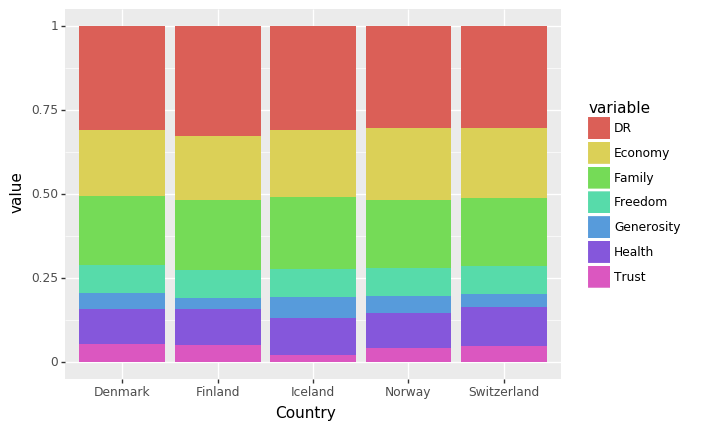

<ggplot: (-9223371873427469412)>

In [77]:
#step3
(ggplot(df, aes('Country','value', fill='variable')) + geom_bar(stat='identity', position='fill'))

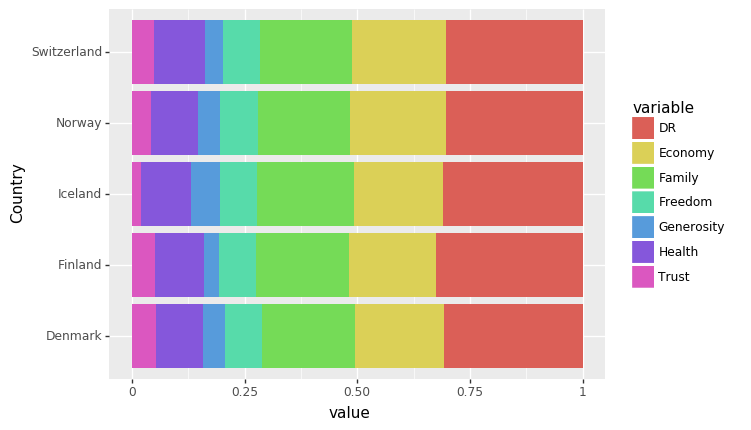

<ggplot: (-9223371873427469468)>

In [79]:
#Step4
#coord_flip을 이용하여 x, y축 바꾸기
(ggplot(df, aes('Country','value', fill='variable')) + geom_bar(stat='identity', position='fill')+coord_flip())

In [106]:
#2.4 Eastern Asia의 연도별 행복지수 요인들 분포
#step1
ea = Happy[Happy['Region']=="Eastern Asia"]
ea.head()

,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year
37,Taiwan,2.32323,1.29098,1.07617,0.39740,0.25376,38,6.298,0.87530,Eastern Asia,0.08129,2015
45,Japan,1.68435,1.27074,1.25712,0.49615,0.10705,46,5.987,0.99111,Eastern Asia,0.18060,2015
46,South Korea,2.21978,1.24461,0.95774,0.33208,0.18557,47,5.984,0.96538,Eastern Asia,0.07857,2015
71,Hong Kong,0.65429,1.38604,1.05818,0.59608,0.39478,72,5.474,1.01328,Eastern Asia,0.37124,2015
83,China,1.86040,0.89012,0.94675,0.51697,0.08185,84,5.140,0.81658,Eastern Asia,0.02781,2015


In [107]:
#step2
#Tidy Data 만들기
#id_var: year, Country
#melt_vars: DR, Economy, Family, Freedom, Generosity, Health, Trust
#head() 출력
ea= ea.drop(['H_Rank','H_Score','Region'],axis=1)
ea



,Country,DR,Economy,Family,Freedom,Generosity,Health,Trust,year
37,Taiwan,2.323230,1.290980,1.076170,0.397400,0.253760,0.875300,0.081290,2015
45,Japan,1.684350,1.270740,1.257120,0.496150,0.107050,0.991110,0.180600,2015
46,South Korea,2.219780,1.244610,0.957740,0.332080,0.185570,0.965380,0.078570,2015
71,Hong Kong,0.654290,1.386040,1.058180,0.596080,0.394780,1.013280,0.371240,2015
83,China,1.860400,0.890120,0.946750,0.516970,0.081850,0.816580,0.027810,2015
99,Mongolia,1.347590,0.828190,1.300600,0.436260,0.332300,0.602680,0.026660,2015
192,Taiwan,2.615230,1.397290,0.926240,0.323770,0.254950,0.795650,0.066300,2016
210,Japan,1.805840,1.380070,1.060540,0.467610,0.102240,0.914910,0.189850,2016
215,South Korea,2.350150,1.359480,0.721940,0.251680,0.188240,0.886450,0.077160,2016
232,Hong Kong,0.926140,1.510700,0.870210,0.480790,0.400970,0.952770,0.316470,2016


In [108]:

ea = pd.melt(ea, id_vars=['year','Country'])
ea.head()

,year,Country,variable,value
0,2015,Taiwan,DR,2.32323
1,2015,Japan,DR,1.68435
2,2015,South Korea,DR,2.21978
3,2015,Hong Kong,DR,0.65429
4,2015,China,DR,1.86040


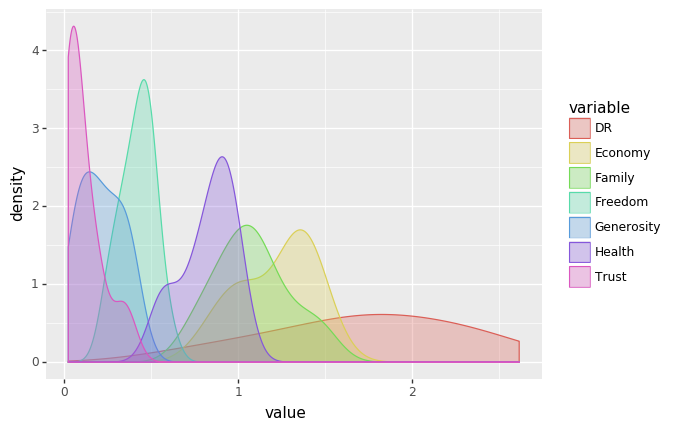

<ggplot: (-9223371873425081480)>

In [109]:
#step3
#density plot 그리기
#fill은 variable을 기준으로 하기
#alpha는 0.3

(ggplot(ea, aes('value', fill='variable', color='variable')) +geom_density(alpha=.3))

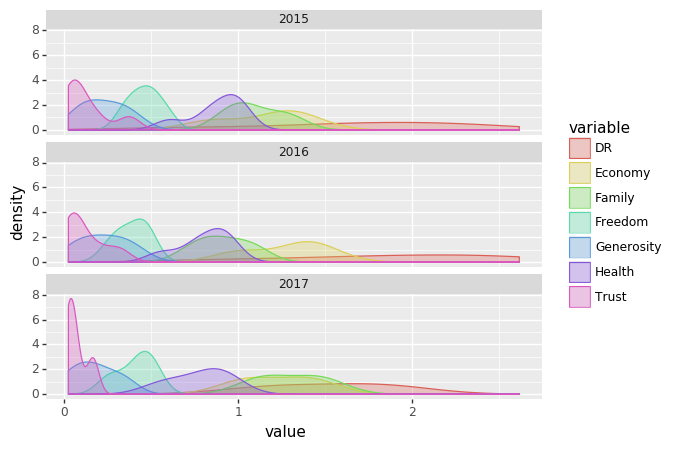

<ggplot: (-9223371873425292420)>

In [111]:
#Step4
#facet_wrap 활용하여 연도별 분포 보기
p = (ggplot(ea, aes('value', fill='variable', color='variable')) +
    geom_density(alpha=.3))
p +  facet_wrap('year', nrow=3)